In [66]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Load the data
data = pd.read_csv('innovation_optimization_data.csv')

In [68]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Pack', 'Product_Type', 'Promotion', 'Placement', 'Proposition', 'Launch_Month', 'Region'], drop_first=True)

In [69]:
# Separate features and target variable
X = data.drop(['Product', 'Success'], axis=1)
y = data['Success']

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Initialize the model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [72]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [74]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [75]:
# Display additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.76        30
           1       0.89      0.78      0.83        50

    accuracy                           0.80        80
   macro avg       0.79      0.81      0.79        80
weighted avg       0.81      0.80      0.80        80



In [76]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[25  5]
 [11 39]]


# Findings and Insights

## Success Rate Analysis

The success rate of projects was influenced by several factors:

- **Launch Month Impact:** Projects launched in August tended to be more successful, possibly due to festival impacts. In Bangladesh, people are in festive mood and they spend on shopping during EID as they get EID bonus.
- **Year-End Boost:** End-of-year projects performed better compared to the beginning of the year. This could be due to the fact that, there is a pressure regarding year-end target meetup, which accelerates the sales. During year beginning this is not much observed.
- **Promotion Matters:** Projects with more promotion had higher success rates.

## Visualizations

Let's explore some visualizations to better understand the trends.

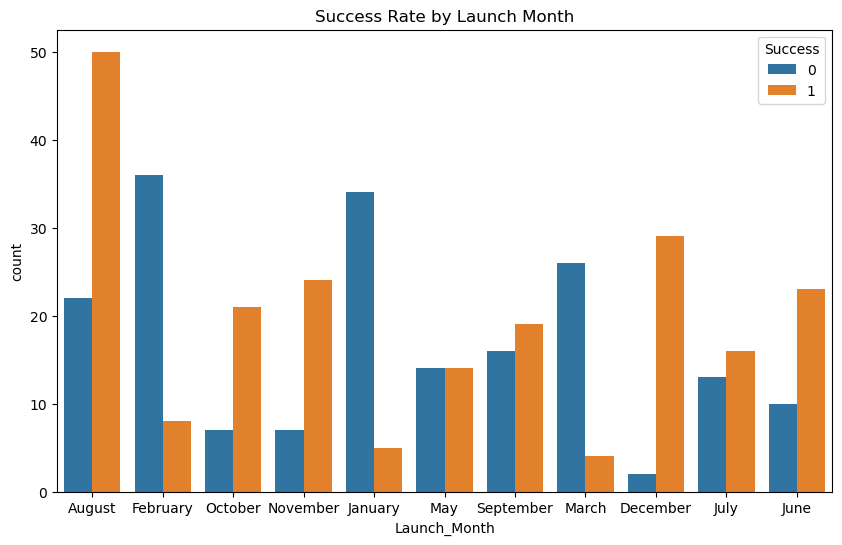

In [77]:
# Visualization 1: Success Rate by Launch Month
launch_month_columns = [col for col in data.columns if col.startswith('Launch_Month')]
data['Launch_Month'] = data[launch_month_columns].idxmax(axis=1).str.replace('Launch_Month_', '')

plt.figure(figsize=(10, 6))
sns.countplot(x='Launch_Month', hue='Success', data=data)
plt.title('Success Rate by Launch Month')
plt.show()

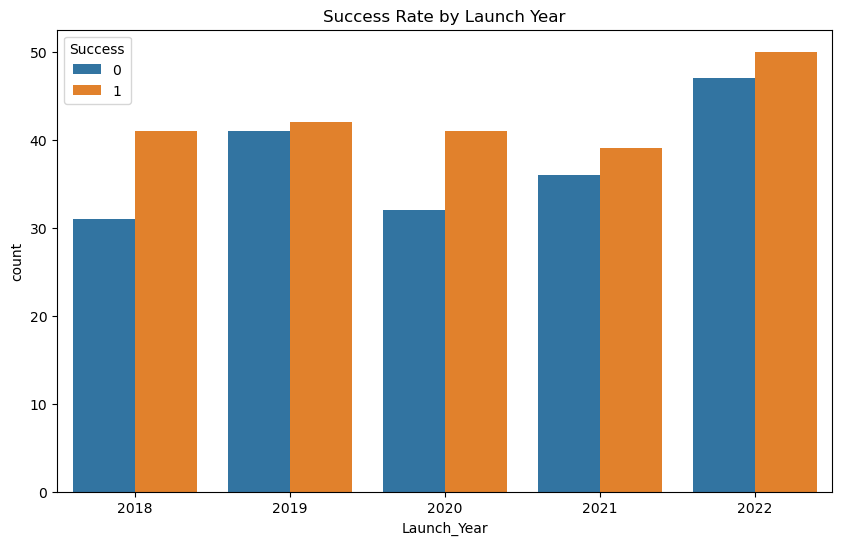

In [78]:
# Visualization 2: Success Rate by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Launch_Year', hue='Success', data=data)
plt.title('Success Rate by Launch Year')
plt.show()

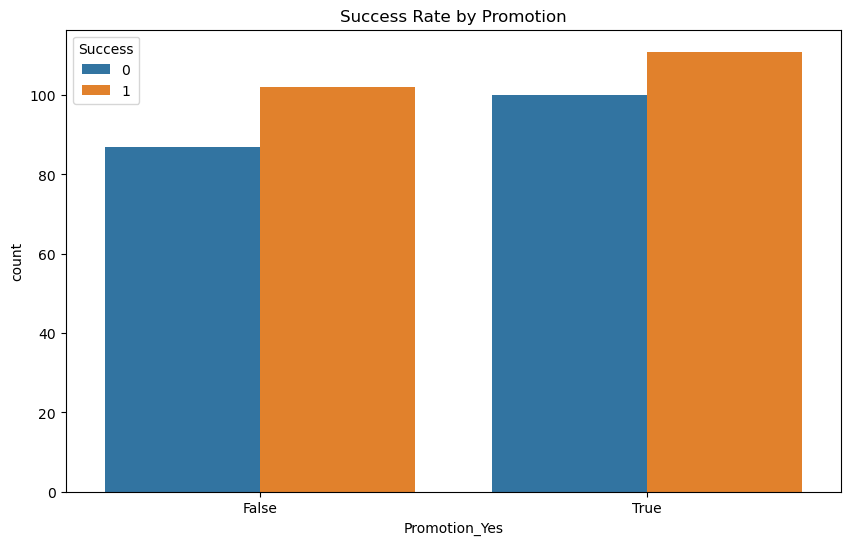

In [79]:
# Visualization 3: Success Rate by Promotion
plt.figure(figsize=(10, 6))
sns.countplot(x='Promotion_Yes', hue='Success', data=data)
plt.title('Success Rate by Promotion')
plt.show()